In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip freeze 

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential,Model,model_from_json
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import glob
import keras
from keras.applications import vgg16
from keras.layers import Input
import matplotlib.pyplot as plt

# Data Augmentation

In [ ]:
!pip freeze >> requirement.txt

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning Models/storage/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning Models/storage/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'binary')

Found 191 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


# Baseline model

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit_generator(training_set, epochs = 100, validation_data = test_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
24/24 [==============================] - 54s 2s/step - loss: 0.6384 - accuracy: 0.6597 - val_loss: 0.5582 - val_accuracy: 0.6774
Epoch 2/100
24/24 [==============================] - 16s 646ms/step - loss: 0.5971 - accuracy: 0.7277 - val_loss: 0.5605 - val_accuracy: 0.7581
Epoch 3/100
24/24 [==============================] - 16s 641ms/step - loss: 0.5906 - accuracy: 0.7120 - val_loss: 0.5405 - val_accuracy: 0.7419
Epoch 4/100
24/24 [==============================] - 15s 635ms/step - loss: 0.5619 - accuracy: 0.7382 - val_loss: 0.5059 - val_accuracy: 0.8065
Epoch 5/100
24/24 [==============================] - 15s 637ms/step - loss: 0.5580 - accuracy: 0.7173 - val_loss: 0.4877 - val_accuracy: 0.8065
Epoch 6/100
24/24 [==============================] - 15s 637ms/step - loss: 0.5334 - accuracy: 0.7277 - val_loss: 0.4862 - val_accuracy: 0.7581
Epoch 7/100
24/24 [==============================] - 15s 641ms/step - loss: 0.5050 - accuracy: 0.7749 - val_loss: 0.4809 - val_accuracy: 0.

# Plot accuracies

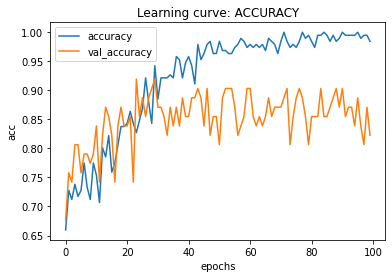

In [ ]:
history

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.title("Learning curve: ACCURACY")
plt.show()

# Plot losses

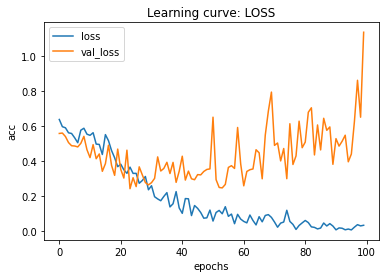

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.title("Learning curve: LOSS")
plt.show()

# Save model

In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

INFO:tensorflow:Assets written to: ram://11d043de-5252-4886-a82e-a7efdedc8090/assets


In [ ]:
!pip install flask

In [ ]:
!wget whatsmyip.me

--2022-04-08 22:01:33--  http://whatsmyip.me/
Resolving whatsmyip.me (whatsmyip.me)... 185.107.56.204
Connecting to whatsmyip.me (whatsmyip.me)|185.107.56.204|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://ww1.whatsmyip.me [following]
--2022-04-08 22:01:34--  http://ww1.whatsmyip.me/
Resolving ww1.whatsmyip.me (ww1.whatsmyip.me)... 199.59.243.200
Connecting to ww1.whatsmyip.me (ww1.whatsmyip.me)|199.59.243.200|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [ <=>                ]   1.31K  --.-KB/s    in 0s      

2022-04-08 22:01:34 (124 MB/s) - ‘index.html’ saved [1341]



In [ ]:
!pip install flask-ngrok


In [ ]:


# load json and create model
json_file = open('/content/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.predict('/content/Y18.JPG')



In [ ]:
import cv2

json_file = open('/content/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/model.h5")
print("Loaded model from disk")
 

loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

img = cv2.imread('/content/temp.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

predictions = (loaded_model.predict(img) > 0.5).astype("int32")


print(predictions[0])

Loaded model from disk
[1]


In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok
from flask import jsonify
app = Flask(__name__)

import os
from flask import Flask, flash, request, redirect, url_for
from werkzeug.utils import secure_filename

ALLOWED_EXTENSIONS = set(['txt', 'pdf', 'png', 'jpg', 'jpeg', 'gif'])
run_with_ngrok(app)   
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER


@app.route("/")
def home():
    if 'file' not in request.files:
        flash('No file part')
        return redirect(request.url)

        file = request.files['file']

        print(file.save('/content', "temp.jpg"))
    return jsonify({
        "server": "running"
    })


    
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://27e6-34-125-5-217.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


[2022-04-08 22:39:06,112] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.7/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-44-d250505aa1d0>", line 22, in home
    flash('No file part')
  File "/usr/local/lib/python